<a href="https://colab.research.google.com/github/DanielMerkdo/analitica_salud/blob/main/b_exploracion_limpieza_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación del notebook

## Conexion BD

In [5]:
# Montar drive y crear path para sys y para directorio de trabajo

from google.colab import drive
drive.mount('/content/drive')

import sys
import os

# Define el path al directorio de trabajo actual
path = "/content/drive/My Drive/cod/analitica_salud"


sys.path.append(path) ### para importar archivo de funciones propias a través de import

os.chdir(path) ### para que por defecto suba y descargue archivos partiendo de esa ruta

Mounted at /content/drive


## Cargar librerías

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import math
import statsmodels.api as sm

from sklearn.linear_model import LassoCV
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from scipy.stats import zscore, shapiro, kstest, anderson
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
import a_funciones as funciones     # Importar las funciones
import importlib
importlib.reload(funciones)

<module 'a_funciones' from '/content/drive/MyDrive/cod/analitica_salud/a_funciones.py'>

In [ ]:
!pip install unidecode

## Descarga de las bases de datos en el notebook

In [8]:
import pandas as pd
df = pd.read_csv('data/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Exploración de los datos

## Limpieza y Transformacion

In [9]:
salud_df=df.copy()

In [10]:
salud_df.shape

(70000, 13)

Se evidencian 13 variables y 70000 registros

In [11]:
####################################################################
# Información del tipo de variables #
####################################################################
salud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# Variables del dataset:
#
# id            | Identificador               | id         | int – número identificador del paciente
# age           | Variable objetiva           | age        | int (días) – edad en días
# gender        | Variable objetiva           | gender     | categórica – 1: mujer, 2: hombre
# height        | Variable objetiva           | height     | int (cm) – estatura en centímetros
# weight        | Variable objetiva           | weight     | float (kg) – peso en kilogramos
# ap_hi         | Variable de examen físico   | ap_hi      | int – presión arterial sistólica
# ap_lo         | Variable de examen físico   | ap_lo      | int – presión arterial diastólica
# cholesterol   | Variable de examen físico   | cholesterol| categórica – 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal
# gluc          | Variable de examen físico   | gluc       | categórica – 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal
# smoke         | Variable subjetiva          | smoke      | binaria – si el paciente fuma o no
# alco          | Variable subjetiva          | alco       | binaria – si el paciente consume alcohol
# active        | Variable subjetiva          | active     | binaria – si el paciente realiza actividad física
# cardio        | Variable objetivo (target)  | cardio     | binaria – presencia o ausencia de enfermedad cardiovascular


In [12]:
salud_df.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [13]:
###############################################
 #Se determino eliminar la columna Id ya que no aparta para el modelo#
###############################################
salud_df.drop(columns=['id'],axis=1,inplace=True)  # Drop elimina la columna de forma permanente

#convertir la columna de edad en dias a  edad pero en años
salud_df['age'] = (salud_df['age'] / 365).astype(int)

salud_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [14]:
####################################################################
# Transformaciones de columnas #
###################################################################
#Las variables cholesterol, gluc, smoke, alcohol, active y cardio realmente son variables categóricas, se realiza su transformación


In [15]:
salud_df["gender"] = salud_df["gender"].astype("object") # 1 - women, 2 - men
salud_df["cholesterol"] = salud_df["cholesterol"].astype("object") # 1: normal, 2: above normal, 3: well above normal
salud_df["gluc"] = salud_df["gluc"].astype("object") # 1: normal, 2: above normal, 3: well above normal
salud_df["smoke"] = salud_df["smoke"].astype("object") # Si el paciente fuma o no
salud_df["alco"] = salud_df["alco"].astype("object") # Si el paciente consume alcohol o no
salud_df["active"] = salud_df["active"].astype("object") # Si el paciente realiza actividad física o no
salud_df["cardio"] = salud_df["cardio"].astype("object") #Si el paciente presenta enfermedad cardíaca o no


In [16]:
salud_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [17]:
salud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  object 
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  object 
 7   gluc         70000 non-null  object 
 8   smoke        70000 non-null  object 
 9   alco         70000 non-null  object 
 10  active       70000 non-null  object 
 11  cardio       70000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 6.4+ MB


In [18]:
salud_df.isnull().sum()

,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


No se evidencian registros nulos

In [19]:
salud_df.duplicated().sum()

np.int64(3208)

No se evidencian registros duplicados

## Análisis variables númericas

### Analisis Univariado

In [20]:
numericas = salud_df.select_dtypes(include=[np.number])
numericas.describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,164.359229,74.205690,128.817286,96.630414
std,6.766774,8.210126,14.395757,154.011419,188.472530
min,29.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000


Las columnas de altura y peso evidencian que la altura mínima es de 55 cm y el peso mínimo es de 10 kg, esto es incoherente ya que la edad mínima es de que equivale a 29 años. Por otro lado, la altura máxima es de 250 cm y el peso máximo es de 200 kg, lo cual podría no ser representativo al generalizar los datos.

Los valores negativos en ap_hi y ap_lo (por ejemplo, -150 o -70) son imposibles para la presión arterial y reflejan errores en la captura de datos. Estos valores deben ser considerados outliers y eliminados o corregidos, ya que afectan la calidad del análisis y pueden distorsionar los resultados.

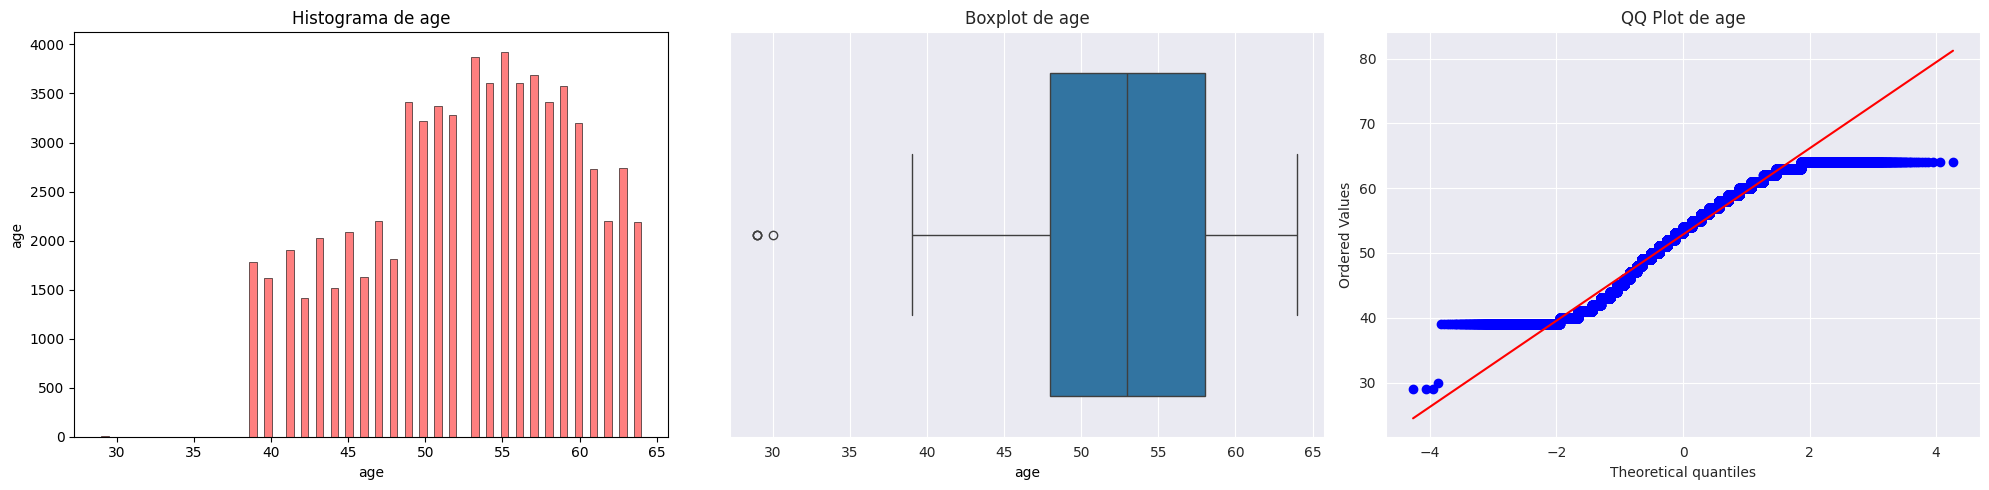

In [21]:
################################################################
# Gráfica para las columna edad #
################################################################

funciones.crear_graficos(salud_df,'age')

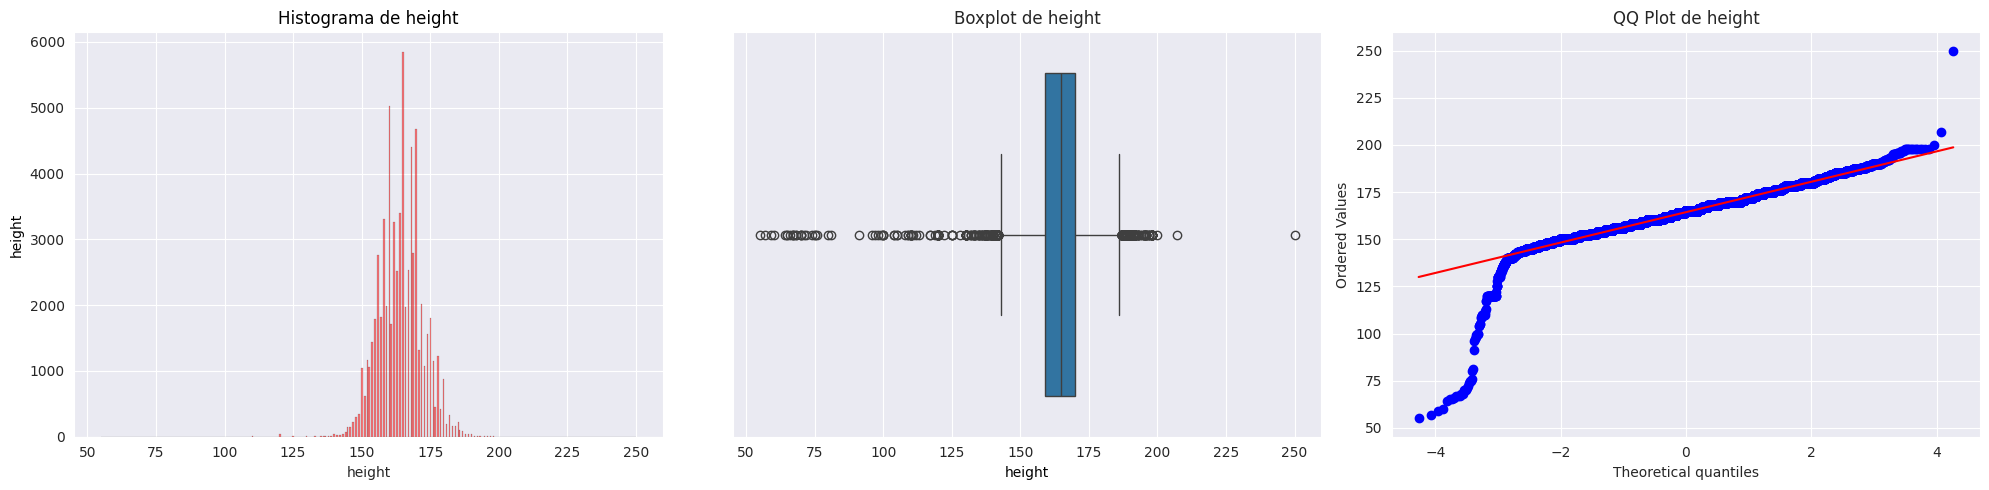

In [22]:
################################################################
# Gráfica para las columna altura
################################################################

funciones.crear_graficos(salud_df,'height')

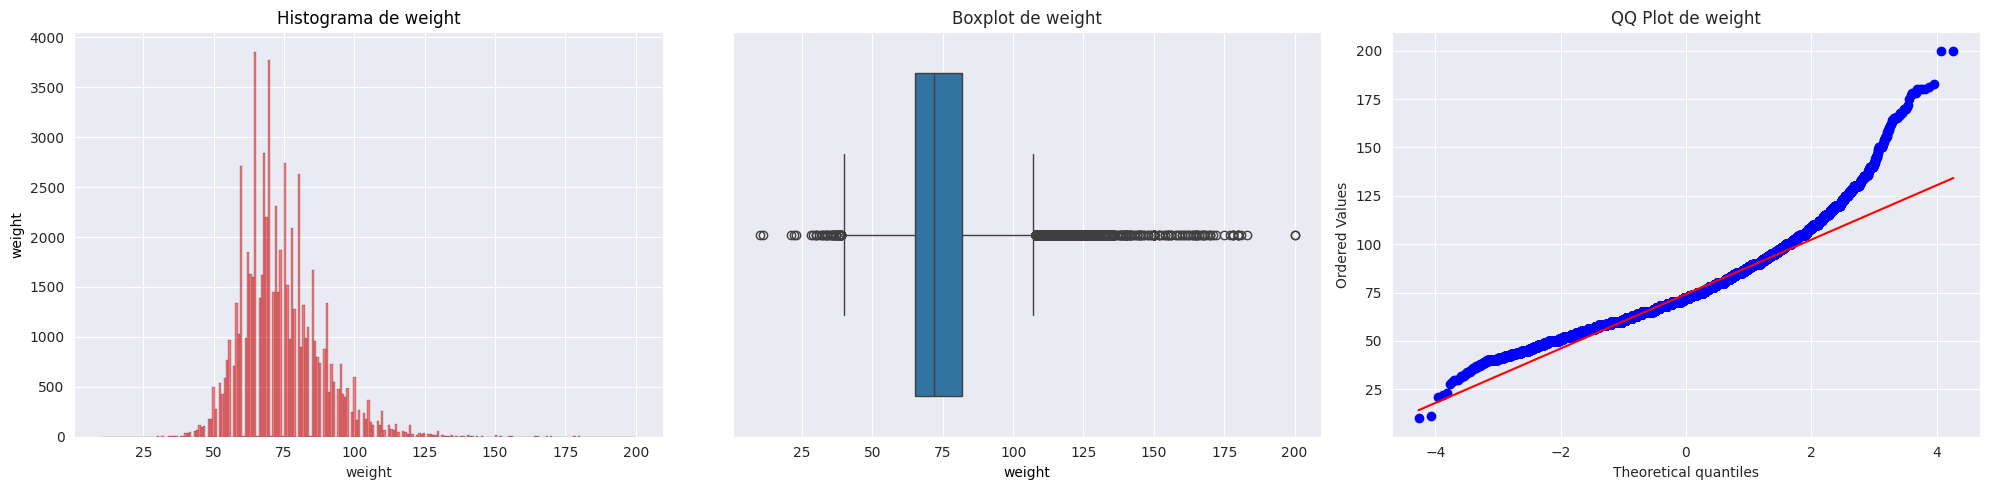

In [23]:
################################################################
# Gráfica para las columna peso #
################################################################

funciones.crear_graficos(salud_df,'weight')

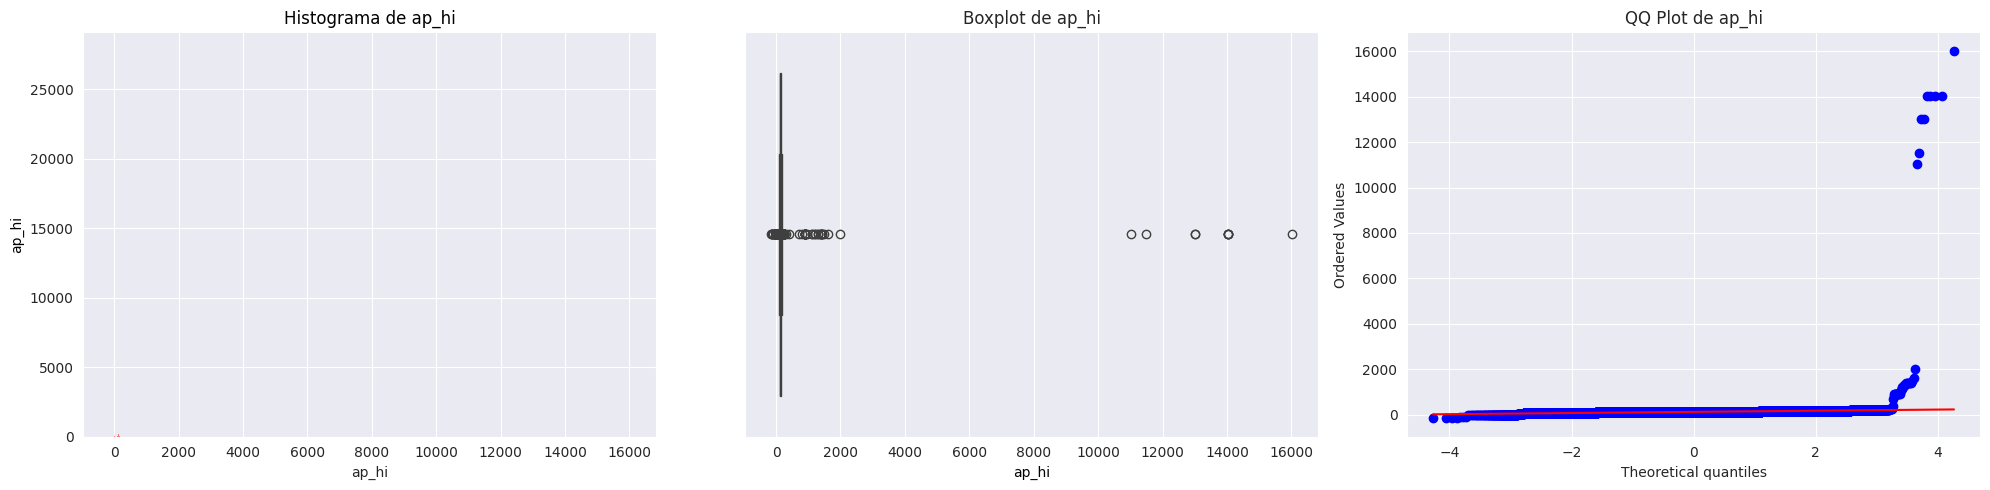

In [24]:
################################################################
# Gráfica para la columna Presión arterial sistólica #
################################################################

funciones.crear_graficos(salud_df,'ap_hi')

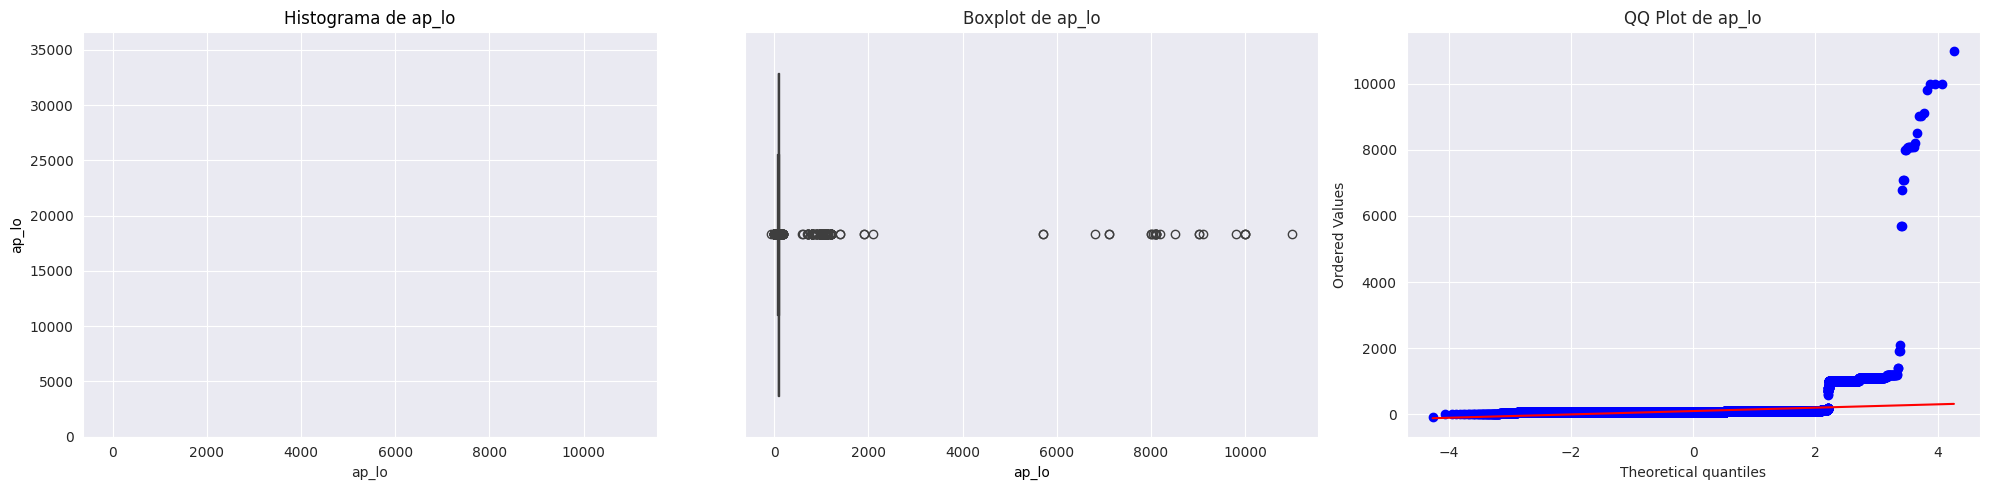

In [25]:
################################################################
# Gráfica para la columna Presión arterial diastolica #
################################################################

funciones.crear_graficos(salud_df,'ap_lo')

### Datos Atípicos

In [72]:
# Lista de variables numéricas
variables_numericas = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for var in variables_numericas:
    print("#######################################################################")
    print(f"# Detección de outliers usando IQR en la variable: {var}")
    print("#######################################################################")

    data = salud_df[var]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detectar outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    print(f"Número de outliers detectados en {var}: {len(outliers)}")
    print(f"Valores mínimos fuera de rango: {outliers.min()}")
    print(f"Valores máximos fuera de rango: {outliers.max()}")
    print()


#######################################################################
# Detección de outliers usando IQR en la variable: age
#######################################################################
Número de outliers detectados en age: 4
Valores mínimos fuera de rango: 29
Valores máximos fuera de rango: 30

#######################################################################
# Detección de outliers usando IQR en la variable: height
#######################################################################
Número de outliers detectados en height: 519
Valores mínimos fuera de rango: 55
Valores máximos fuera de rango: 250

#######################################################################
# Detección de outliers usando IQR en la variable: weight
#######################################################################
Número de outliers detectados en weight: 1819
Valores mínimos fuera de rango: 10.0
Valores máximos fuera de rango: 200.0

###############################################

### Eliminacion Atipicos

Se eliminan para altura y peso los valores que caen por debajo del percentil 2.5% y por encima del 97.5%, es decir, se descarta el 5% más extremo de los datos (2.5% en cada cola). Esto permite eliminar outliers muy alejados sin perder la mayoría representativa del conjunto, mejorando la precisión del análisis.

In [73]:
# Filtrar índices donde height está fuera del rango
idx_height = salud_df[(salud_df['height'] > salud_df['height'].quantile(0.975)) |
                      (salud_df['height'] < salud_df['height'].quantile(0.025))].index

# Filtrar índices donde weight está fuera del rango
idx_weight = salud_df[(salud_df['weight'] > salud_df['weight'].quantile(0.975)) |
                      (salud_df['weight'] < salud_df['weight'].quantile(0.025))].index

# Unir índices para eliminar sin duplicados
idx_to_drop = idx_height.union(idx_weight)

# Eliminar filas del DataFrame
salud_df.drop(idx_to_drop, inplace=True)

In [74]:
salud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64352 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          64352 non-null  int64  
 1   gender       64352 non-null  object 
 2   height       64352 non-null  int64  
 3   weight       64352 non-null  float64
 4   ap_hi        64352 non-null  int64  
 5   ap_lo        64352 non-null  int64  
 6   cholesterol  64352 non-null  object 
 7   gluc         64352 non-null  object 
 8   smoke        64352 non-null  object 
 9   alco         64352 non-null  object 
 10  active       64352 non-null  object 
 11  cardio       64352 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 6.4+ MB


La presión arterial sistólica (ap_hi) debe ser siempre mayor o igual que la diastólica (ap_lo). Si ap_lo > ap_hi, es un error o dato inconsistente. Ademas la presión arterial no puede ser negativa

In [75]:
inaccurate_bp = salud_df[salud_df['ap_lo'] > salud_df['ap_hi']]
print(f"Número de registros con presión diastólica mayor que sistólica: {len(inaccurate_bp)}")

Número de registros con presión diastólica mayor que sistólica: 1093


In [76]:
#Filtrar registros válidos para presión arterial (sin valores extremos, negativos ni inconsistencias)
salud_df = salud_df[
    (salud_df['ap_hi'] >= salud_df['ap_hi'].quantile(0.025)) &
    (salud_df['ap_hi'] <= salud_df['ap_hi'].quantile(0.975)) &
    (salud_df['ap_lo'] >= salud_df['ap_lo'].quantile(0.025)) &
    (salud_df['ap_lo'] <= salud_df['ap_lo'].quantile(0.975)) &
    (salud_df['ap_hi'] >= 0) &
    (salud_df['ap_lo'] >= 0) &
    (salud_df['ap_hi'] >= salud_df['ap_lo'])
]

# 4. Reiniciar el índice
salud_df.reset_index(drop=True, inplace=True)


In [77]:
salud_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60602,53,1,172,70.0,130,90,1,1,0,0,1,1
60603,57,1,165,80.0,150,80,1,1,0,0,1,1
60604,52,2,168,76.0,120,80,1,1,1,0,1,0
60605,61,1,163,72.0,135,80,1,2,0,0,0,1


In [78]:
numericas2 = salud_df.select_dtypes(include=[np.number])
numericas2.describe()

,age,height,weight,ap_hi,ap_lo
count,60607.000000,60607.000000,60607.000000,60607.000000,60607.000000
mean,52.840398,164.540565,73.466799,125.798142,81.054367
std,6.747074,6.839573,11.823669,13.809238,8.256202
min,29.000000,150.000000,51.000000,100.000000,60.000000
25%,48.000000,160.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,169.000000,80.000000,135.000000,90.000000
max,64.000000,180.000000,108.000000,165.000000,100.000000


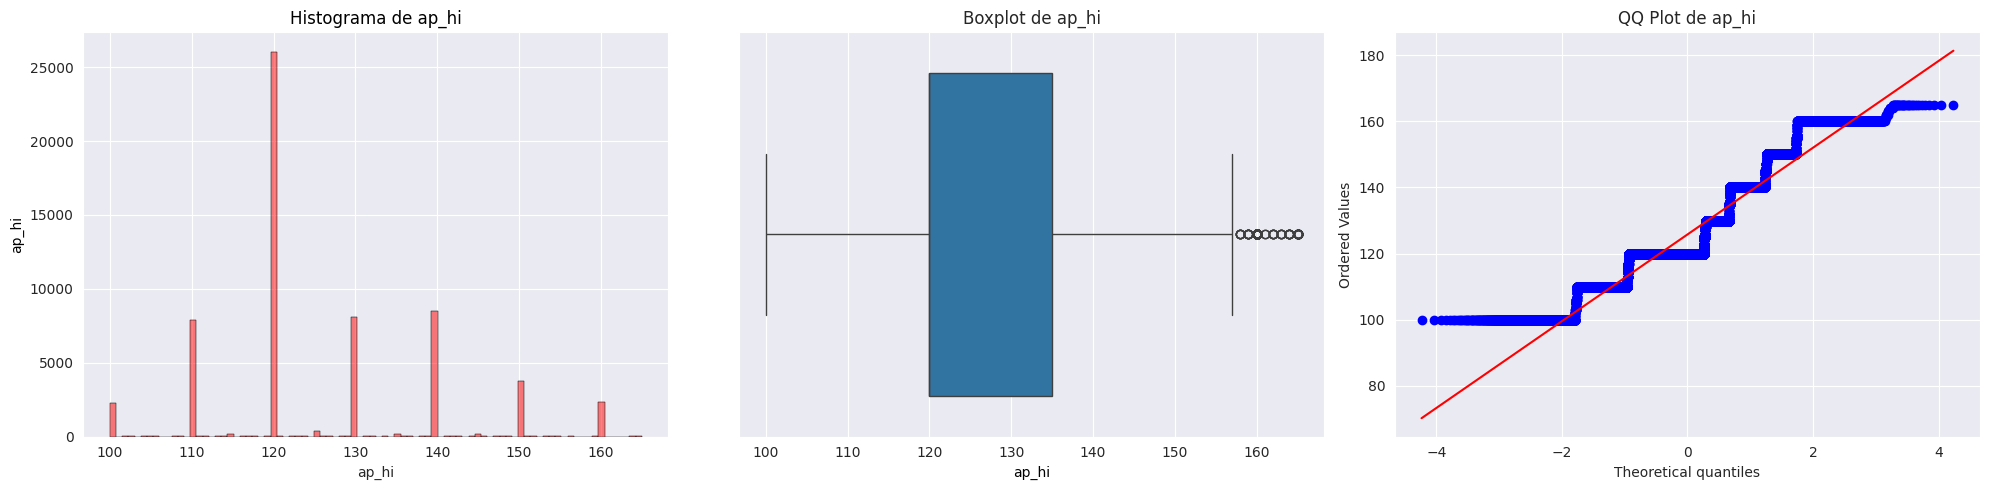

In [87]:
funciones.crear_graficos(salud_df,'ap_hi')

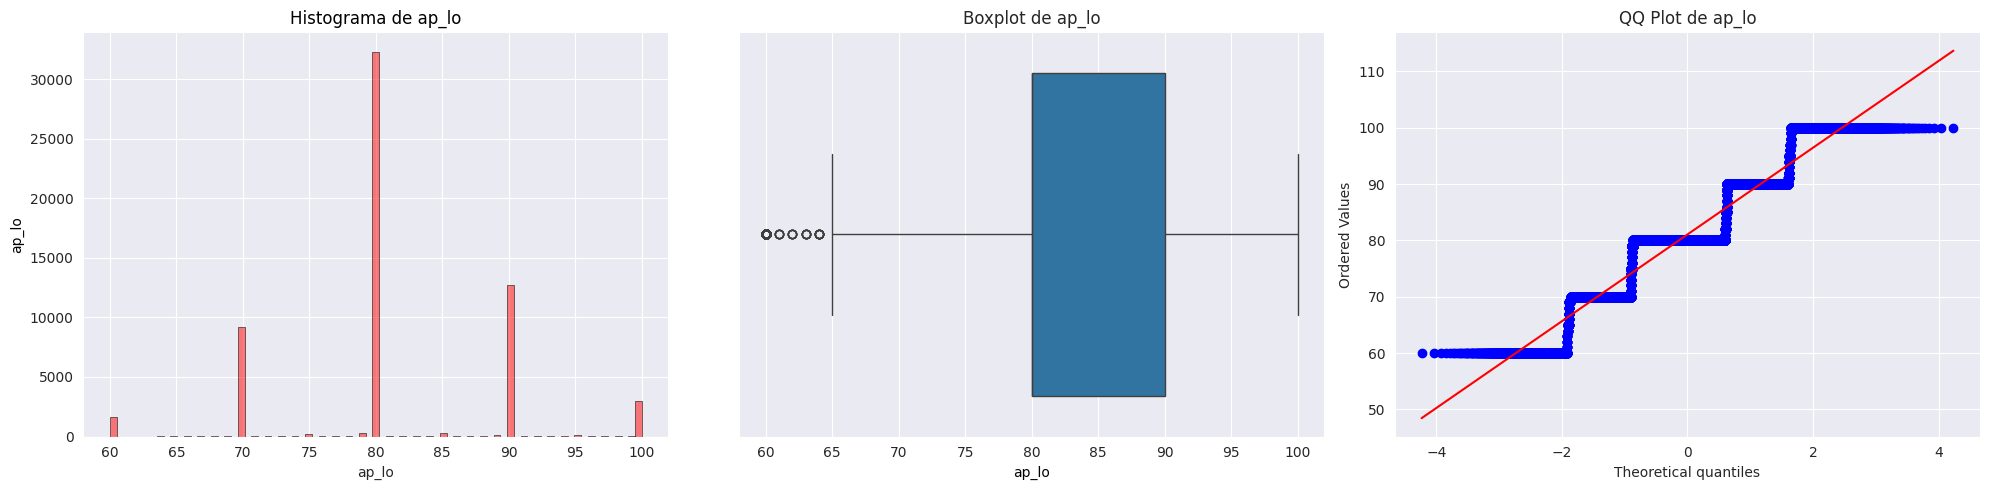

In [88]:
funciones.crear_graficos(salud_df,'ap_lo')

### Pruebas de Normalidad

In [81]:
# Aplicar la prueba de Shapiro-Wilk a cada variable
# Aunque solo es recomendable para muestras pequeñas, se realiza a modo de verificación se tendran en cuenta las  Pruebas de
# Kolmogorov y de Anderson Darlin

for variable in numericas:
    print(f'\nPrueba de Shapiro-Wilk para variable - {variable}:')
    stat, p_value = shapiro(numericas[variable])
    print('Estadístico=%.3f, p-valor=%.6f' % (stat, p_value))
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula, la variable sigue una distribución normal.")
    else:
        print("Se rechaza la hipótesis nula, la variable no sigue una distribución normal.")


Prueba de Shapiro-Wilk para variable - age:
Estadístico=0.965, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.

Prueba de Shapiro-Wilk para variable - height:
Estadístico=0.963, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.

Prueba de Shapiro-Wilk para variable - weight:
Estadístico=0.954, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.

Prueba de Shapiro-Wilk para variable - ap_hi:
Estadístico=0.027, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.

Prueba de Shapiro-Wilk para variable - ap_lo:
Estadístico=0.073, p-valor=0.000000
Se rechaza la hipótesis nula, la variable no sigue una distribución normal.


In [82]:
# Prueba de Kolmogorov-Smirnov
for variable in numericas:
    print(f'\nPrueba de Kolmogorov-Smirnov para {variable}:')
    stat, p_value = kstest(numericas[variable], 'norm')
    print('Estadístico=%.3f, p-valor=%.6f' % (stat, p_value))
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: la variable sigue una distribución normal.")
    else:
        print("Se rechaza la hipótesis nula: la variable no sigue una distribución normal.")


Prueba de Kolmogorov-Smirnov para age:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.

Prueba de Kolmogorov-Smirnov para height:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.

Prueba de Kolmogorov-Smirnov para weight:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.

Prueba de Kolmogorov-Smirnov para ap_hi:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.

Prueba de Kolmogorov-Smirnov para ap_lo:
Estadístico=1.000, p-valor=0.000000
Se rechaza la hipótesis nula: la variable no sigue una distribución normal.


In [83]:
# Prueba de Anderson-Darling
for variable in numericas:
    print(f'\nPrueba de Anderson-Darling para {variable}:')
    result = anderson(numericas[variable], dist='norm')
    print('Estadístico=%.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        print('Nivel de significancia=%.1f%%: estadístico crítico=%.3f' % (result.significance_level[i], result.critical_values[i]))
        if result.statistic < result.critical_values[i]:
            print(f'\n La variable {variable}: sigue una distribución normal')
        else:
            print(f'\n La variable "{variable}"no sigue una distribución normal')


Prueba de Anderson-Darling para age:
Estadístico=548.185
Nivel de significancia=15.0%: estadístico crítico=0.576

 La variable "age"no sigue una distribución normal
Nivel de significancia=10.0%: estadístico crítico=0.656

 La variable "age"no sigue una distribución normal
Nivel de significancia=5.0%: estadístico crítico=0.787

 La variable "age"no sigue una distribución normal
Nivel de significancia=2.5%: estadístico crítico=0.918

 La variable "age"no sigue una distribución normal
Nivel de significancia=1.0%: estadístico crítico=1.092

 La variable "age"no sigue una distribución normal

Prueba de Anderson-Darling para height:
Estadístico=130.665
Nivel de significancia=15.0%: estadístico crítico=0.576

 La variable "height"no sigue una distribución normal
Nivel de significancia=10.0%: estadístico crítico=0.656

 La variable "height"no sigue una distribución normal
Nivel de significancia=5.0%: estadístico crítico=0.787

 La variable "height"no sigue una distribución normal
Nivel de sig

### Analisis Multicolinealidad

In [84]:
# Seleccionamos las variables numéricas del dataframe df_salud
X = salud_df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]

# Agregamos una constante para el modelo (requerido por VIF)
X = sm.add_constant(X)

# Calculamos el VIF para cada variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostramos los resultados
print("###########################################")
print("# Análisis de Multicolinealidad (VIF)     #")
print("###########################################")
print(vif_data)

###########################################
# Análisis de Multicolinealidad (VIF)     #
###########################################
  Variable         VIF
0    const  757.901043
1      age    1.052129
2   height    1.081295
3   weight    1.141841
4    ap_hi    2.014314
5    ap_lo    1.952591


### Analisis Bivariado

In [85]:
######################################################################################
# Tabla de la correlacción de las variables númericas del curso de álgebra vectorial #
######################################################################################
correlation_matrix = numericas.corr()
correlation_matrix

,age,height,weight,ap_hi,ap_lo
age,1.000000,-0.081506,0.053561,0.020854,0.017620
height,-0.081506,1.000000,0.290968,0.005488,0.006150
weight,0.053561,0.290968,1.000000,0.030702,0.043710
ap_hi,0.020854,0.005488,0.030702,1.000000,0.016086
ap_lo,0.017620,0.006150,0.043710,0.016086,1.000000


Text(77.78159722222227, 0.5, 'Variables')

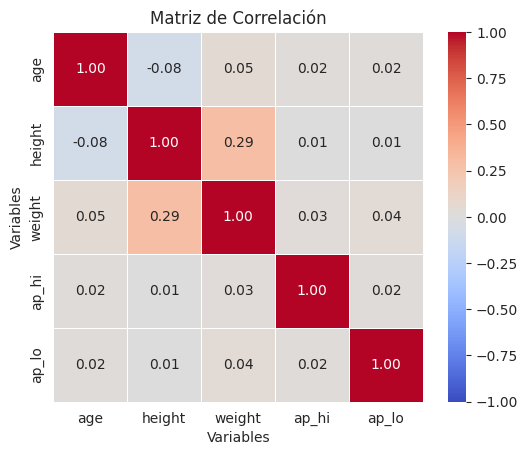

In [86]:
########################################################################################
# Gráfica de la correlacción de las variables númericas del curso de álgebra vectorial #
########################################################################################
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, square=True)

# Agregar título y etiquetas
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')


## Analisis variables categóricas

### Analisis Univariado

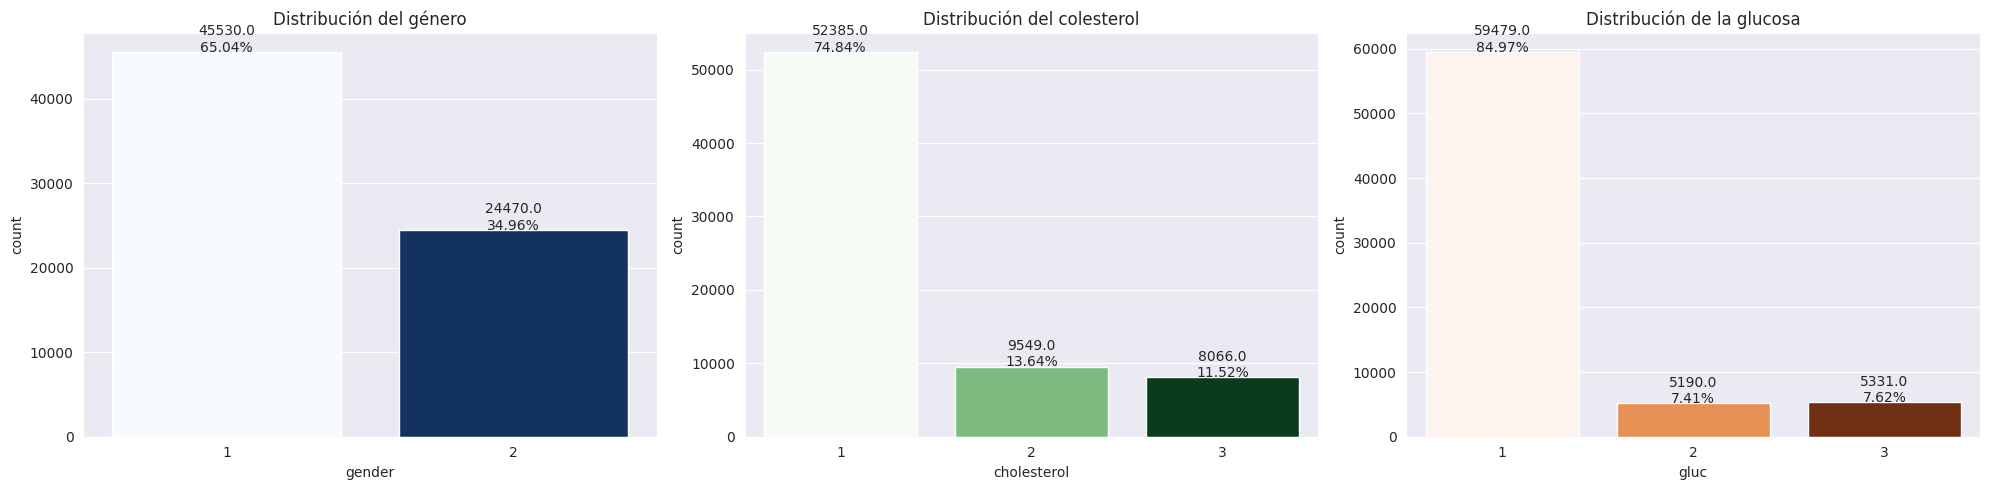

In [33]:
fig, gra = plt.subplots(ncols=3, figsize=(20, 5))


# Gráfico para 'gender'
sns.countplot(x='gender', data=salud_df, ax=gra[0],hue="gender" ,palette='Blues', legend=False)
gra[0].set_title('Distribución del género')
funciones.agregar_etiquetas_con_ratio(gra[0], salud_df['gender'])

# Gráfico para 'cholesterol"
sns.countplot(x='cholesterol', data=salud_df, ax=gra[1], hue="cholesterol",palette='Greens',legend=False)
gra[1].set_title('Distribución del colesterol')
funciones.agregar_etiquetas_con_ratio(gra[1], salud_df['cholesterol'])

# Gráfico para glucosa
sns.countplot(x='gluc', data=salud_df, ax=gra[2], hue="gluc",palette='Oranges', legend=False)
gra[2].set_title('Distribución de la glucosa')
funciones.agregar_etiquetas_con_ratio(gra[2], salud_df['gluc'])

plt.tight_layout()
plt.show()


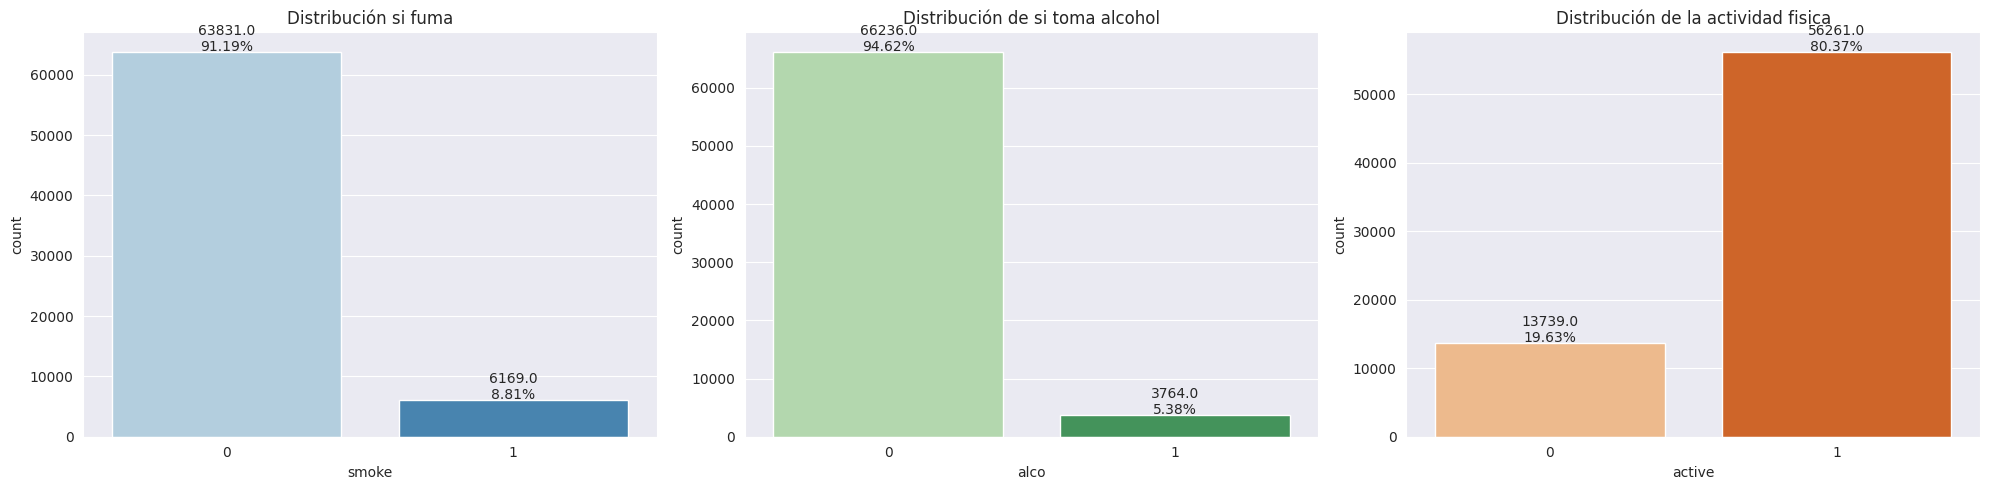

In [34]:
fig, gra = plt.subplots(ncols=3, figsize=(20, 5))

# Gráfico para 'smoke'
sns.countplot(x='smoke', data=salud_df, ax=gra[0],hue="smoke" ,palette='Blues', legend=False)
gra[0].set_title('Distribución consumo de cigarrillo')
funciones.agregar_etiquetas_con_ratio(gra[0], salud_df['smoke'])

# Gráfico para 'alcohol
sns.countplot(x='alco', data=salud_df, ax=gra[1], hue="alco",palette='Greens',legend=False)
gra[1].set_title('Distribución de consumo de alcohol')
funciones.agregar_etiquetas_con_ratio(gra[1], salud_df['alco'])

# Gráfico para active
sns.countplot(x='active', data=salud_df, ax=gra[2], hue="active",palette='Oranges', legend=False)
gra[2].set_title('Distribución de la actividad fisica')
funciones.agregar_etiquetas_con_ratio(gra[2], salud_df['active'])

plt.tight_layout()
plt.show()


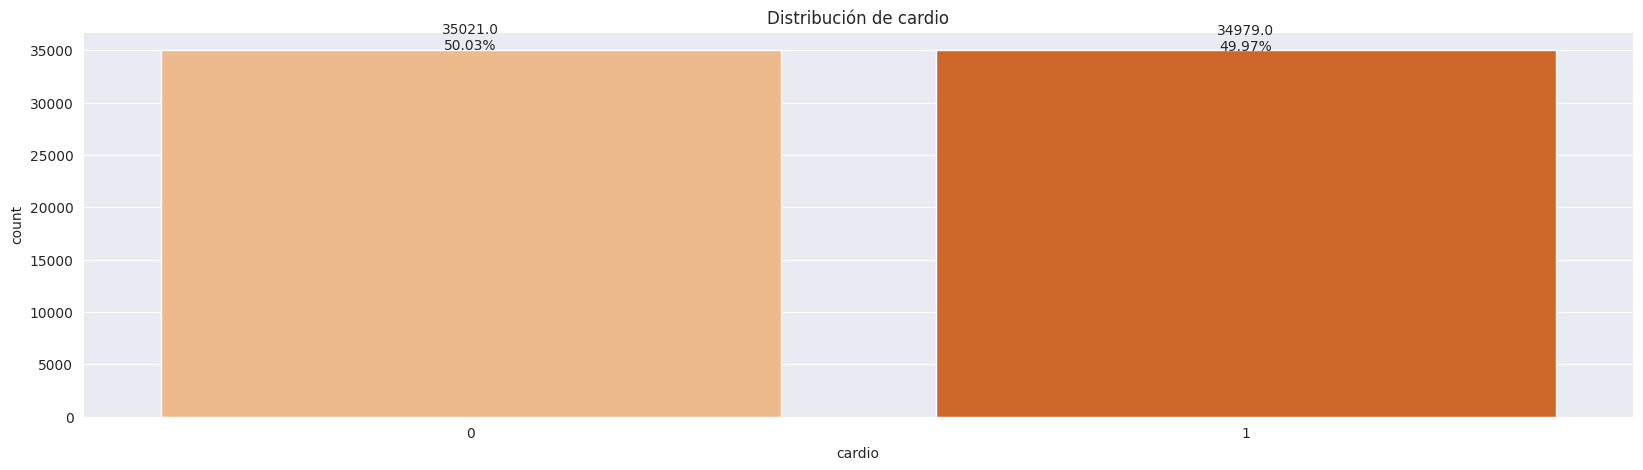

In [37]:
#Distribución de variable objetivo cardio
fig, ax = plt.subplots(ncols=1, figsize=(20, 5))
sns.countplot(x='cardio', data=salud_df, ax=ax, hue="cardio", palette='Oranges', legend=False)
ax.set_title('Presencia de enfermedad cardiovascular')
funciones.agregar_etiquetas_con_ratio(ax, salud_df['cardio'])
plt.show()

### Analisis Bivariado

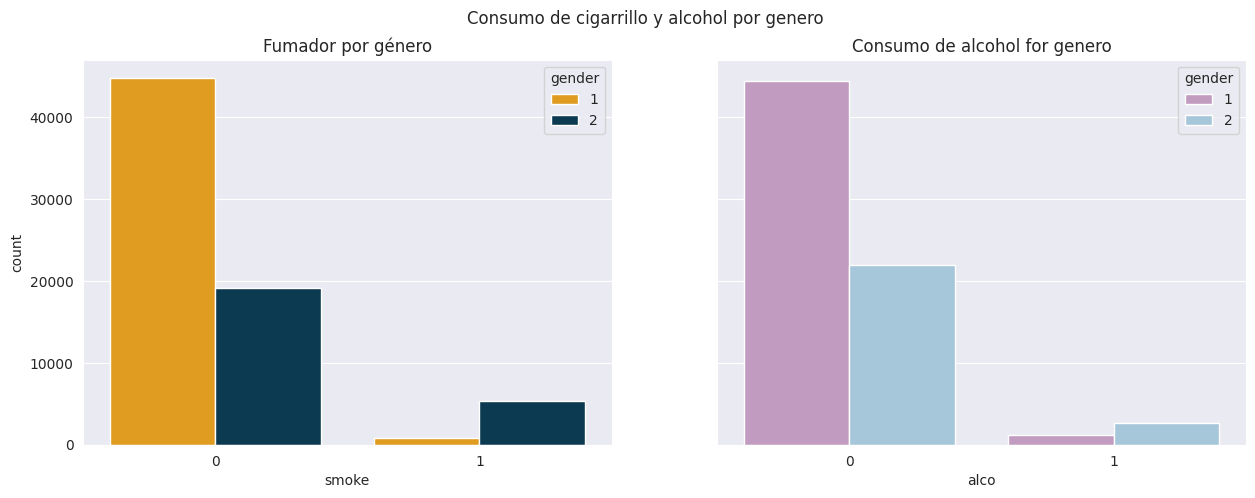

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Consumo de cigarrillo y alcohol por genero')

colors = ['#ffa600', '#003f5c']
sns.countplot(ax=axes[0], x=df.smoke,hue=df.gender,palette=colors)
axes[0].set_title("Fumador por género")

colors = ['#c994c7', '#9ecae1']
sns.countplot(ax=axes[1], x=df.alco,hue=df.gender,palette=colors)
axes[1].set_title("Consumo de alcohol por genero")
plt.show()

<Figure size 1000x600 with 0 Axes>

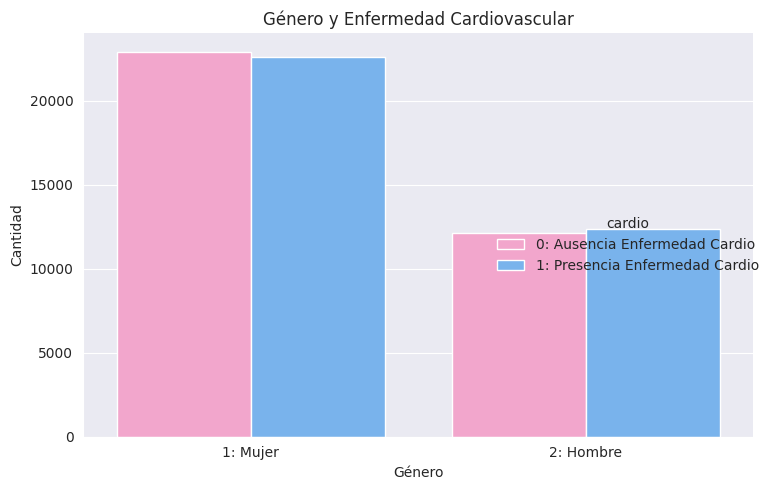

In [50]:
grouped_data = df.groupby(['gender', 'cardio']).size().reset_index(name='count')

# Mapeo de etiquetas
gender_map = {
    1: '1: Mujer',
    2: '2: Hombre',
}

cardio_map = {
    0: '0: Ausencia Enfermedad Cardio',
    1: '1: Presencia Enfermedad Cardio'
}

# Aplicar los mapeos
grouped_data['gender'] = grouped_data['gender'].map(gender_map)
grouped_data['cardio'] = grouped_data['cardio'].map(cardio_map)


colors = ['#ff99cc', '#66b3ff']
plt.figure(figsize=(10, 6))
sns.catplot(x='gender', y='count', hue='cardio', kind='bar', palette=colors, data=grouped_data)

plt.title('Género y Enfermedad Cardiovascular')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

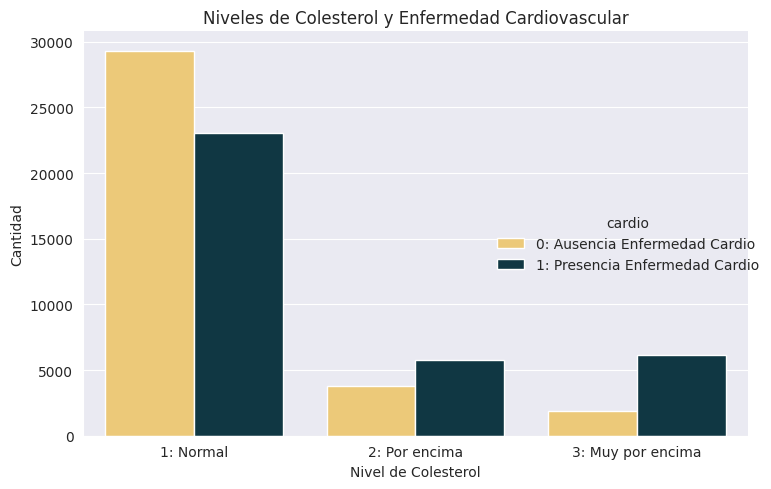

In [59]:
grouped_data = df.groupby(['cholesterol', 'cardio']).size().reset_index(name='count')

# Mapeo de etiquetas
cholesterol_map = {
    1: '1: Normal',
    2: '2: Por encima',
    3: '3: Muy por encima'
}

cardio_map = {
    0: '0: Ausencia Enfermedad Cardio',
    1: '1: Presencia Enfermedad Cardio'
}

# Aplicar los mapeos
grouped_data['cholesterol'] = grouped_data['cholesterol'].map(cholesterol_map)
grouped_data['cardio'] = grouped_data['cardio'].map(cardio_map)


colors =['#ffd166', '#073b4c']
plt.figure(figsize=(10, 6))
sns.catplot(x='cholesterol', y='count', hue='cardio', kind='bar', palette=colors, data=grouped_data)

plt.title('Niveles de Colesterol y Enfermedad Cardiovascular')
plt.xlabel('Nivel de Colesterol')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

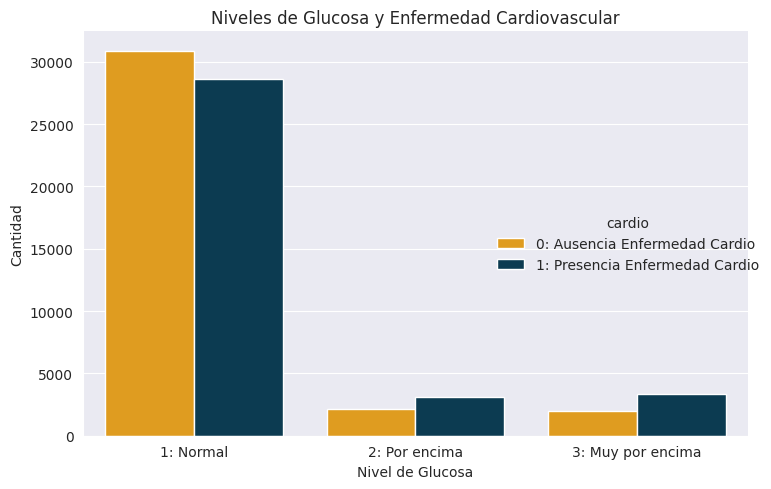

In [55]:
grouped_data = df.groupby(['gluc', 'cardio']).size().reset_index(name='count')

# Mapeo de etiquetas
gluc_map = {
    1: '1: Normal',
    2: '2: Por encima',
    3: '3: Muy por encima'
}

cardio_map = {
    0: '0: Ausencia Enfermedad Cardio',
    1: '1: Presencia Enfermedad Cardio'
}

# Aplicar los mapeos
grouped_data['gluc'] = grouped_data['gluc'].map(gluc_map)
grouped_data['cardio'] = grouped_data['cardio'].map(cardio_map)


colors = ['#ffa600', '#003f5c']
plt.figure(figsize=(10, 6))
sns.catplot(x='gluc', y='count', hue='cardio', kind='bar', palette=colors, data=grouped_data)

plt.title('Niveles de Glucosa y Enfermedad Cardiovascular')
plt.xlabel('Nivel de Glucosa')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

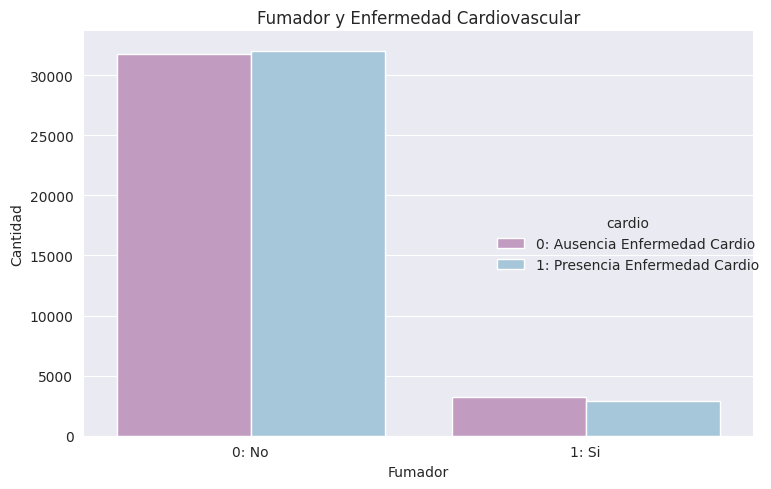

In [56]:
grouped_data = df.groupby(['smoke', 'cardio']).size().reset_index(name='count')

# Mapeo de etiquetas
smoke_map = {
    0: '0: No',
    1: '1: Si',
}

cardio_map = {
    0: '0: Ausencia Enfermedad Cardio',
    1: '1: Presencia Enfermedad Cardio'
}

# Aplicar los mapeos
grouped_data['smoke'] = grouped_data['smoke'].map(smoke_map)
grouped_data['cardio'] = grouped_data['cardio'].map(cardio_map)


colors = ['#c994c7', '#9ecae1']
plt.figure(figsize=(10, 6))
sns.catplot(x='smoke', y='count', hue='cardio', kind='bar', palette=colors, data=grouped_data)

plt.title('Fumador y Enfermedad Cardiovascular')
plt.xlabel('Fumador')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

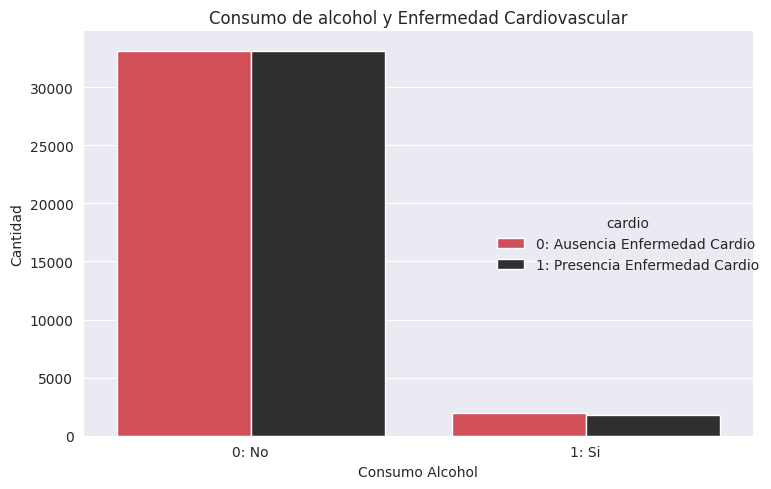

In [57]:
grouped_data = df.groupby(['alco', 'cardio']).size().reset_index(name='count')

# Mapeo de etiquetas
alco_map = {
    0: '0: No',
    1: '1: Si',
}

cardio_map = {
    0: '0: Ausencia Enfermedad Cardio',
    1: '1: Presencia Enfermedad Cardio'
}

# Aplicar los mapeos
grouped_data['alco'] = grouped_data['alco'].map(alco_map)
grouped_data['cardio'] = grouped_data['cardio'].map(cardio_map)


colors =  ['#e63946', '#2f2f2f']
plt.figure(figsize=(10, 6))
sns.catplot(x='alco', y='count', hue='cardio', kind='bar', palette=colors, data=grouped_data)

plt.title('Consumo de alcohol y Enfermedad Cardiovascular')
plt.xlabel('Consumo Alcohol')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

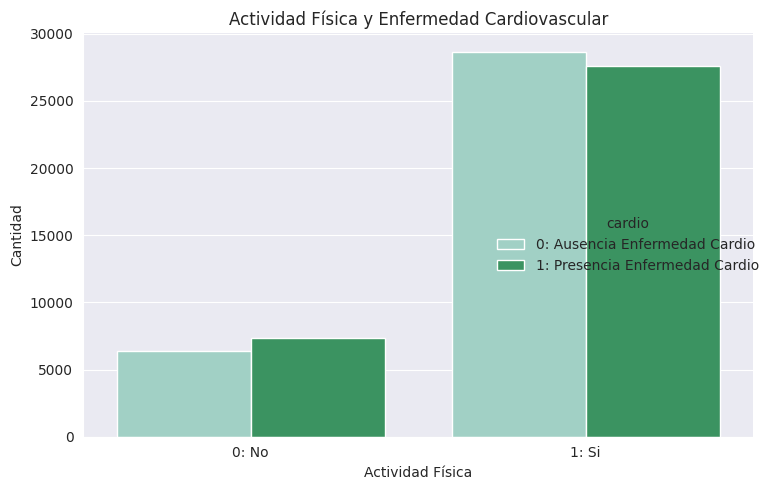

In [60]:
grouped_data = df.groupby(['active', 'cardio']).size().reset_index(name='count')

# Mapeo de etiquetas
active_map = {
    0: '0: No',
    1: '1: Si',
}

cardio_map = {
    0: '0: Ausencia Enfermedad Cardio',
    1: '1: Presencia Enfermedad Cardio'
}

# Aplicar los mapeos
grouped_data['active'] = grouped_data['active'].map(active_map)
grouped_data['cardio'] = grouped_data['cardio'].map(cardio_map)


colors =   ['#99d8c9', '#2ca25f']
plt.figure(figsize=(10, 6))
sns.catplot(x='active', y='count', hue='cardio', kind='bar', palette=colors, data=grouped_data)

plt.title('Actividad Física y Enfermedad Cardiovascular')
plt.xlabel('Actividad Física')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

In [97]:
saludfinal_df=salud_df.copy()
saludfinal_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60602,53,1,172,70.0,130,90,1,1,0,0,1,1
60603,57,1,165,80.0,150,80,1,1,0,0,1,1
60604,52,2,168,76.0,120,80,1,1,1,0,1,0
60605,61,1,163,72.0,135,80,1,2,0,0,0,1


# Preparación de los Datos

##Escalamiento variables numéricas




In [98]:
salud_escalado=saludfinal_df.copy()

columns_to_scale = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

scaler = MinMaxScaler()

saludfinal_df[columns_to_scale] = scaler.fit_transform(saludfinal_df[columns_to_scale])
print(saludfinal_df.head())

        age gender    height    weight     ap_hi  ap_lo cholesterol gluc  \
0  0.600000      2  0.600000  0.192982  0.153846   0.50           1    1   
1  0.742857      1  0.200000  0.596491  0.615385   0.75           3    1   
2  0.628571      1  0.500000  0.228070  0.461538   0.25           3    1   
3  0.542857      2  0.633333  0.543860  0.769231   1.00           1    1   
4  0.514286      1  0.200000  0.087719  0.000000   0.00           1    1   

  smoke alco active cardio  
0     0    0      1      0  
1     0    0      1      1  
2     0    0      0      1  
3     0    0      1      1  
4     0    0      0      0  


##Codificación variables categóricas

In [103]:
salud_cod=salud_escalado.copy()

In [110]:
data_2 = salud_cod.copy()

# Identificar variables categóricas
categorical_cols = data_2.select_dtypes(include=['object']).columns

# Crear un nuevo DataFrame para almacenar las variables transformadas
transformed_data = pd.DataFrame()

# Transformar variables categóricas con 2 valores usando LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_cols:
    if data_2[col].nunique() == 2:
        # Aplicar LabelEncoder para variables con 2 categorías
        transformed_data[col] = label_encoder.fit_transform(data_2[col])
    else:
        # Aplicar pd.get_dummies para variables con más de 2 categorías
        dummies = pd.get_dummies(data_2[col], prefix=col, drop_first=True)
        # Asegurarse de que las variables dummy sean numéricas (0 y 1)
        dummies = dummies.astype(int)
        transformed_data = pd.concat([transformed_data, dummies], axis=1)

# Añadir columnas numéricas no transformadas
numerical_cols = data_2.select_dtypes(include=['number']).columns
transformed_data = pd.concat([transformed_data, data_2[numerical_cols]], axis=1)

# Reordenar las columnas para asegurarnos de que 'nota_03_binary' esté al final
transformed_data = transformed_data[[col for col in transformed_data.columns if col != 'cardio'] + ['cardio']]

# Mostrar el DataFrame transformado
print("DataFrame transformado:")

salud_cod = transformed_data.copy()
salud_cod.head()

DataFrame transformado:


,gender,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke,alco,active,age,height,weight,ap_hi,ap_lo,cardio
0,1,0,0,0,0,0,0,1,50,168,62.0,110,80,0
1,0,0,1,0,0,0,0,1,55,156,85.0,140,90,1
2,0,0,1,0,0,0,0,0,51,165,64.0,130,70,1
3,1,0,0,0,0,0,0,1,48,169,82.0,150,100,1
4,0,0,0,0,0,0,0,0,47,156,56.0,100,60,0


# Selección de variables





### Método Filtrado

In [111]:
##Metodo Filtrado ANOVA
X_num = salud_cod[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]
y = salud_cod['cardio'].astype(int)

f_values, p_values = f_classif(X_num, y)
pd.DataFrame({'Feature': X_num.columns, 'F-value': f_values, 'p-value': p_values}).sort_values(by='F-value', ascending=False)

,Feature,F-value,p-value
3,ap_hi,13651.223280,0.000000e+00
4,ap_lo,7050.376187,0.000000e+00
0,age,3619.819107,0.000000e+00
2,weight,1611.025482,0.000000e+00
1,height,52.099061,5.338674e-13


In [112]:
X_cat = salud_cod[['cholesterol_2', 'cholesterol_3', 'gluc_2', 'gluc_3', 'smoke', 'alco', 'active', 'gender']]
y = salud_cod['cardio'].astype(int)

chi2_stat, p_values = chi2(X_cat, y)
pd.DataFrame({'Feature': X_cat.columns, 'Chi2': chi2_stat, 'p-value': p_values}).sort_values(by='Chi2', ascending=False)

,Feature,Chi2,p-value
1,cholesterol_3,1972.523403,0.000000e+00
0,cholesterol_2,315.394670,1.459030e-70
3,gluc_3,277.500740,2.631703e-62
2,gluc_2,120.915691,3.987216e-28
4,smoke,29.564283,5.409258e-08
6,active,17.850632,2.389399e-05
5,alco,11.316137,7.683638e-04
7,gender,0.749605,3.866014e-01


De acuerdo con el análisis anterior, el género no es una variable representativa

### Método Lasso

In [114]:
# X: todas las variables excepto la variable objetivo
X = salud_cod.drop(columns='cardio')

# y: variable objetivo binaria
y = salud_cod['cardio'].astype(int)

In [116]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

LassoCV(cv=5, random_state=42)

In [117]:
# Recuperar las variables seleccionadas (coeficiente distinto de 0)
selected_features = X.columns[(lasso.coef_ != 0)]
print("Variables seleccionadas:", selected_features.tolist())


Variables seleccionadas: ['cholesterol_2', 'cholesterol_3', 'smoke', 'active', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']


<Axes: title={'center': 'Importancia según Lasso'}>

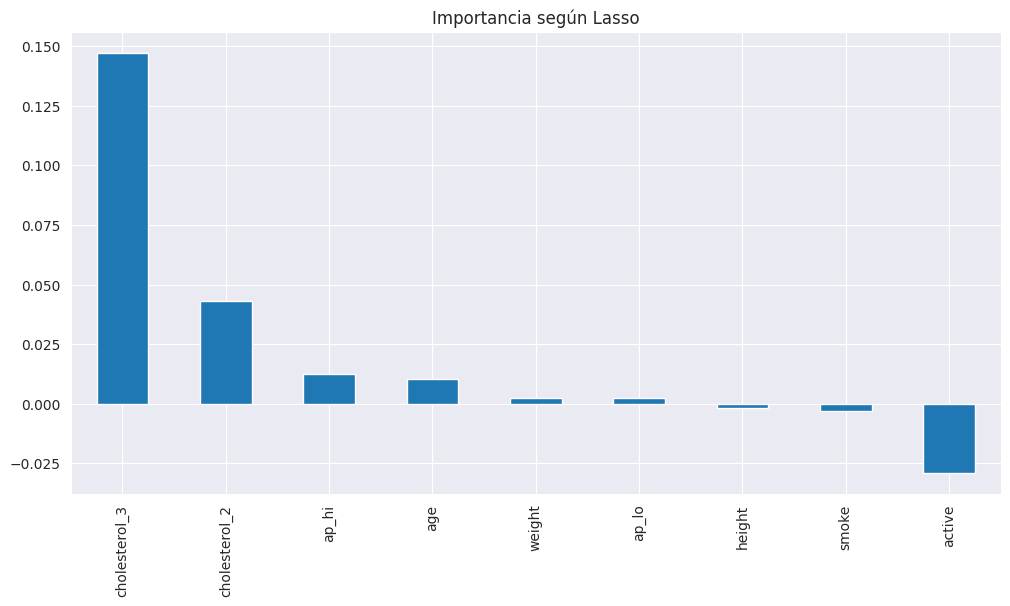

In [118]:

#Ver todos los coeficientes
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
lasso_coef[lasso_coef != 0].sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Importancia según Lasso')

# BD Final

In [120]:
salud_modelado = salud_cod.drop(columns=['gender'])
salud_modelado

,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke,alco,active,age,height,weight,ap_hi,ap_lo,cardio
0,0,0,0,0,0,0,1,50,168,62.0,110,80,0
1,0,1,0,0,0,0,1,55,156,85.0,140,90,1
2,0,1,0,0,0,0,0,51,165,64.0,130,70,1
3,0,0,0,0,0,0,1,48,169,82.0,150,100,1
4,0,0,0,0,0,0,0,47,156,56.0,100,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60602,0,0,0,0,0,0,1,53,172,70.0,130,90,1
60603,0,0,0,0,0,0,1,57,165,80.0,150,80,1
60604,0,0,0,0,1,0,1,52,168,76.0,120,80,0
60605,0,0,1,0,0,0,0,61,163,72.0,135,80,1


In [122]:
import os

# Define la ruta completa a la carpeta 'data' y el nombre del archivo CSV
salida_path = os.path.join("/content/drive/My Drive/cod/analitica_salud/data", "salud_modelado_final.csv")

# Guardar el DataFrame en la ruta especificada
salud_modelado.to_csv(salida_path, index=False)

print(f"Archivo guardado en: {salida_path}")

Archivo guardado en: /content/drive/My Drive/cod/analitica_salud/data/salud_modelado_final.csv
